In [69]:
import json
from urllib import request 
import seaborn as sns
import pandas as pd

In [70]:
# Load the data
df_url = 'https://www.murach.com/python_analysis/shots.json'
df = request.urlretrieve(df_url, filename='shots.json')

with open('data/shots.json') as f:
    df = json.load(f)

df.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [71]:
# Build the dataframe
columnHeaders = df['resultSets'][0]['headers']
columnHeaders = [x.lower() for x in columnHeaders]

rows = df['resultSets'][0]['rowSet']

df = pd.DataFrame(data = rows, columns = columnHeaders)
df.head()

,grid_type,game_id,game_event_id,player_id,player_name,team_id,team_name,period,minutes_remaining,seconds_remaining,...,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_attempted_flag,shot_made_flag,game_date,htm,vtm
0,Shot Chart Detail,0020900015,4,201939,Stephen Curry,1610612744,Golden State Warriors,1,11,25,...,Right Side Center(RC),24+ ft.,26,99,249,1,0,20091028,GSW,HOU
1,Shot Chart Detail,0020900015,17,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,31,...,Left Side Center(LC),16-24 ft.,18,-122,145,1,1,20091028,GSW,HOU
2,Shot Chart Detail,0020900015,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,2,...,Center(C),8-16 ft.,14,-60,129,1,0,20091028,GSW,HOU
3,Shot Chart Detail,0020900015,141,201939,Stephen Curry,1610612744,Golden State Warriors,2,9,49,...,Left Side(L),16-24 ft.,19,-172,82,1,0,20091028,GSW,HOU
4,Shot Chart Detail,0020900015,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,2,19,...,Left Side Center(LC),16-24 ft.,16,-68,148,1,0,20091028,GSW,HOU


In [72]:
# Drop the rows for overtime periods
df = df.query('period < 5.0')

In [73]:
df.columns

Index(['grid_type', 'game_id', 'game_event_id', 'player_id', 'player_name',
       'team_id', 'team_name', 'period', 'minutes_remaining',
       'seconds_remaining', 'event_type', 'action_type', 'shot_type',
       'shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'shot_distance',
       'loc_x', 'loc_y', 'shot_attempted_flag', 'shot_made_flag', 'game_date',
       'htm', 'vtm'],
      dtype='str')

In [74]:
# Locate unneeded columns 
df.nunique(dropna = False)

# Set columns to keep
df = df[['game_id', 'shot_type', 'loc_x', 'loc_y', 'shot_made_flag', 'game_date']]

# Convert game_date to datetime
df['game_date'] = pd.to_datetime(df['game_date'])

In [75]:
# Get column info
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 11753 entries, 0 to 11845
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   game_id         11753 non-null  str           
 1   shot_type       11753 non-null  str           
 2   loc_x           11753 non-null  int64         
 3   loc_y           11753 non-null  int64         
 4   shot_made_flag  11753 non-null  int64         
 5   game_date       11753 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(3), str(2)
memory usage: 642.7 KB


,game_id,shot_type,loc_x,loc_y,shot_made_flag,game_date
0,0020900015,3PT Field Goal,99,249,0,2009-10-28
1,0020900015,2PT Field Goal,-122,145,1,2009-10-28
2,0020900015,2PT Field Goal,-60,129,0,2009-10-28
3,0020900015,2PT Field Goal,-172,82,0,2009-10-28
4,0020900015,2PT Field Goal,-68,148,0,2009-10-28


In [76]:
# Set index on game_id
df = df.set_index('game_id')

# Add a season column
def get_season(row):
    if row.game_date.month > 6:
        season = f'{row.game_date.year} - {row.game_date.year + 1}'
    else: 
        season = f'{row.game_date.year - 1} - {row.game_date.year}'
    return season

df['season'] = df.apply(get_season, axis=1)
df.head()

,shot_type,loc_x,loc_y,shot_made_flag,game_date,season
game_id,,,,,,
0020900015,3PT Field Goal,99,249,0,2009-10-28,2009 - 2010
0020900015,2PT Field Goal,-122,145,1,2009-10-28,2009 - 2010
0020900015,2PT Field Goal,-60,129,0,2009-10-28,2009 - 2010
0020900015,2PT Field Goal,-172,82,0,2009-10-28,2009 - 2010
0020900015,2PT Field Goal,-68,148,0,2009-10-28,2009 - 2010


In [77]:
# Add a string column for shot result
df['shot_result'] = df.shot_made_flag.replace({0: 'Missed', 1: 'Made'})
df.head()

,shot_type,loc_x,loc_y,shot_made_flag,game_date,season,shot_result
game_id,,,,,,,
0020900015,3PT Field Goal,99,249,0,2009-10-28,2009 - 2010,Missed
0020900015,2PT Field Goal,-122,145,1,2009-10-28,2009 - 2010,Made
0020900015,2PT Field Goal,-60,129,0,2009-10-28,2009 - 2010,Missed
0020900015,2PT Field Goal,-172,82,0,2009-10-28,2009 - 2010,Missed
0020900015,2PT Field Goal,-68,148,0,2009-10-28,2009 - 2010,Missed


In [78]:
# Add points made column
df['pts_made'] = df.apply(lambda x: 0 if x.shot_result == 'Missed' else (3 if x.shot_type == '3PT Field Goal' else 2), axis=1)

# Add summary columns for points and shots
df['pts_made_per_game'] = df.groupby('game_id').pts_made.transform('sum')
df['shots_attempted'] = df.groupby('game_id').shot_made_flag.transform('count')
df['shots_made'] = df.groupby('game_id').shot_made_flag.transform('sum')

df[['shot_type', 'pts_made', 'pts_made_per_game', 'shots_attempted', 'shots_made']]

,shot_type,pts_made,pts_made_per_game,shots_attempted,shots_made
game_id,,,,,
0020900015,3PT Field Goal,0,14,12,7
0020900015,2PT Field Goal,2,14,12,7
0020900015,2PT Field Goal,0,14,12,7
0020900015,2PT Field Goal,0,14,12,7
0020900015,2PT Field Goal,0,14,12,7
...,...,...,...,...,...
0021801205,3PT Field Goal,3,25,20,11
0021801215,2PT Field Goal,0,5,4,2
0021801215,3PT Field Goal,3,5,4,2


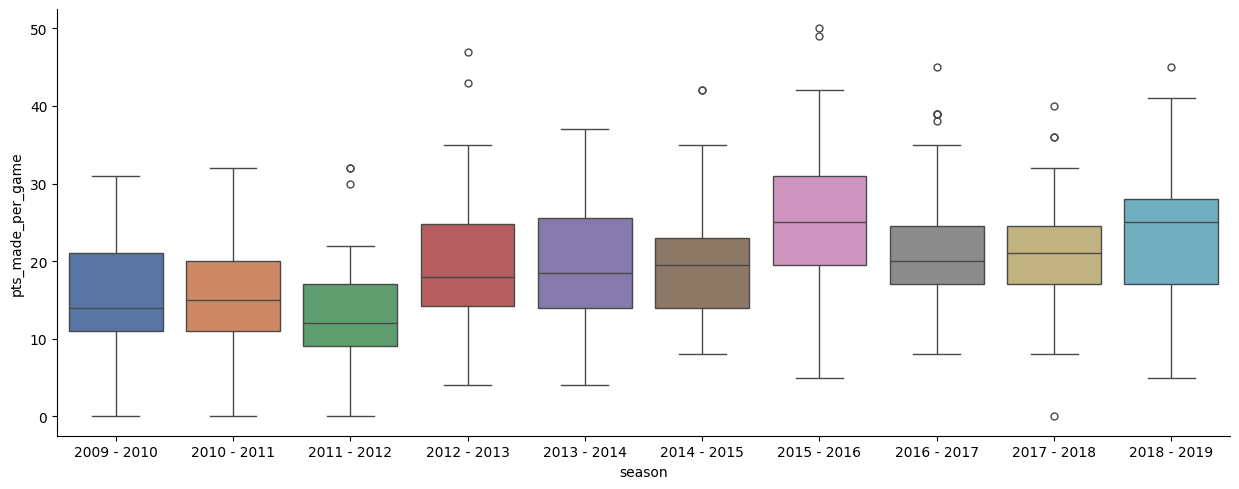

In [79]:
# Get data for shots per season
shots_season = df[['season', 'game_date', 'pts_made_per_game', 'shots_attempted', 'shots_made']].drop_duplicates()
# Plot the points per season
sns.catplot(data = shots_season, kind = 'box', x = 'season', y = 'pts_made_per_game', aspect = 2.5, hue = 'season', palette = 'deep', legend = False)

<Axes: xlabel='season'>

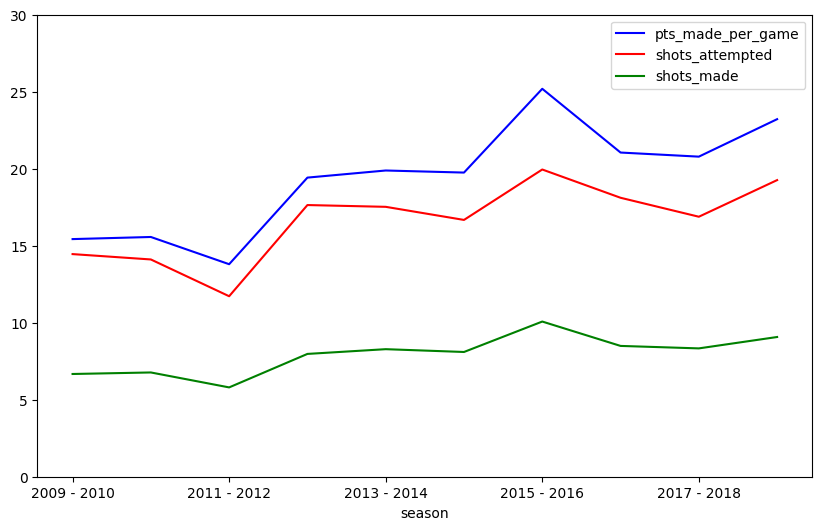

In [80]:
# Group data by season and get averages
shots_season_avg = shots_season.groupby('season').mean().reset_index()

# Plot with pandas
shots_season_avg.plot(x = 'season', y = ['pts_made_per_game', 'shots_attempted', 'shots_made'], color = {'pts_made_per_game': 'blue', 'shots_attempted': 'red', 'shots_made': 'green'}, ylim = (0,30), figsize = (10, 6))

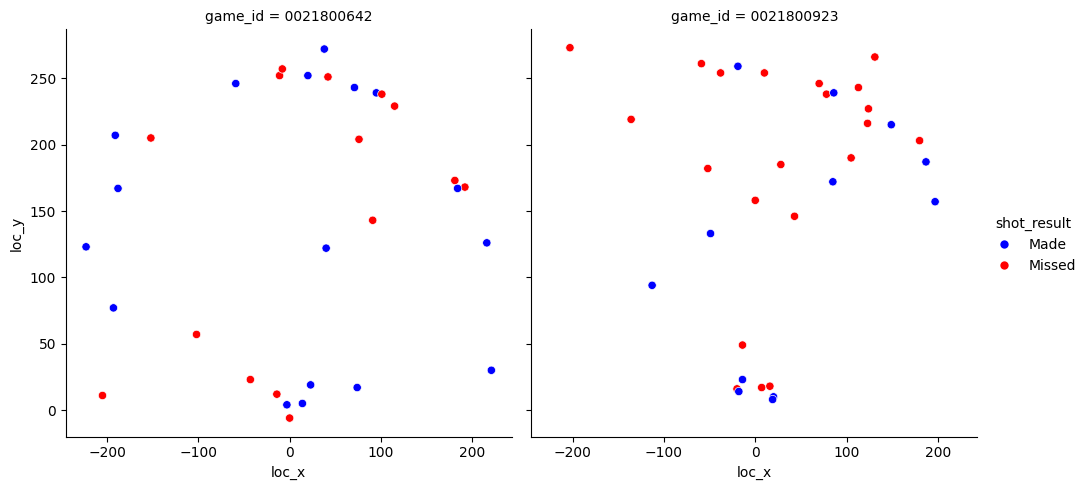

In [81]:
# Plot shot locations for two games

game_ids = ['0021800923', '0021800642']  # First two games of 2019-2020 season
g = sns.relplot(data=df.query('game_id in @game_ids'), kind = 'scatter', x='loc_x', y='loc_y', hue='shot_result', col='game_id', palette={'Made': 'blue', 'Missed': 'red'})

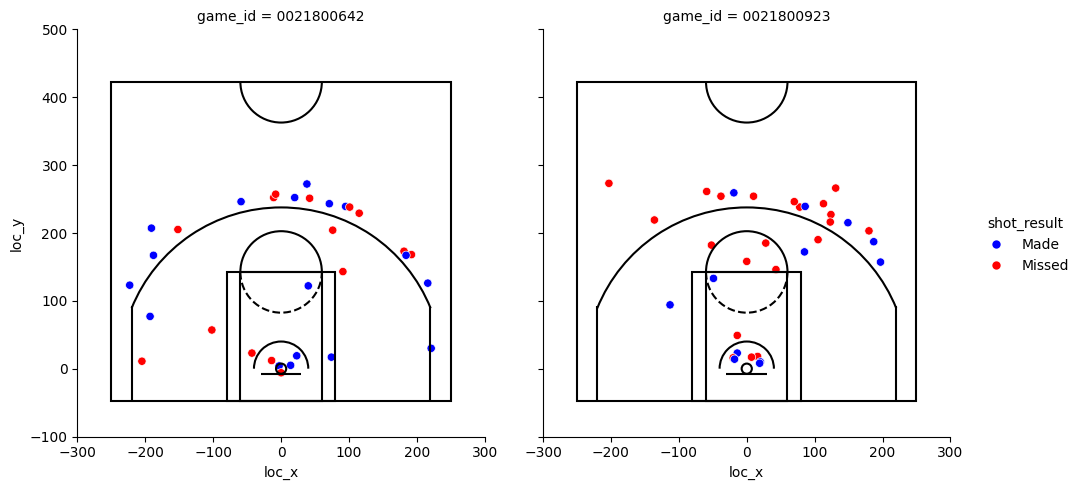

In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax, color='black', lw=1.5):
    # Basket (hoop)
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    # Backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)
    # Outer paint (key)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Inner paint
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    # Free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    # Free throw bottom arc (dashed)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    # Restricted area arc
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    # Three-point arc
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    # Corner three-point lines
    corner_three_left = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_right = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # Center court outer arc
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    # Outer lines
    outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, three_arc,
                      corner_three_left, corner_three_right,
                      center_outer_arc, outer_lines]
    for element in court_elements:
        ax.add_patch(element)
    return ax

# Plot shot locations for two games with court overlay
game_ids = ['0021800923', '0021800642']
g = sns.relplot(data=df.query('game_id in @game_ids'), kind='scatter',
                x='loc_x', y='loc_y', hue='shot_result', col='game_id',
                palette={'Made': 'blue', 'Missed': 'red'})

for ax in g.axes.flat:
    draw_court(ax)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_aspect('equal')

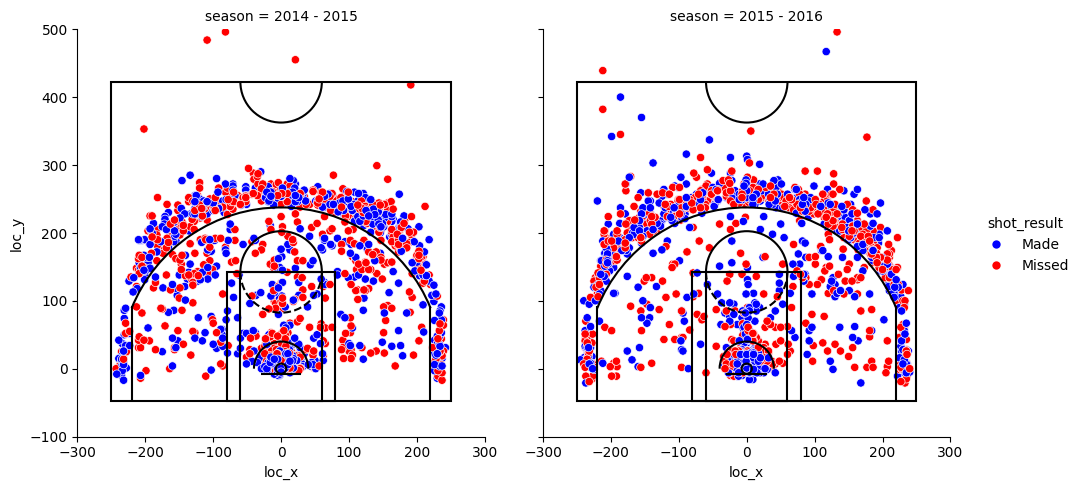

In [83]:
# Plot shot locations for two seasons with court overlay
seasons = ['2014 - 2015', '2015 - 2016']
g = sns.relplot(data=df.query('season in @seasons'), kind='scatter',
                x='loc_x', y='loc_y', hue='shot_result', col='season'
                , palette={'Made': 'blue', 'Missed': 'red'})

for ax in g.axes.flat:
    draw_court(ax)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_aspect('equal')

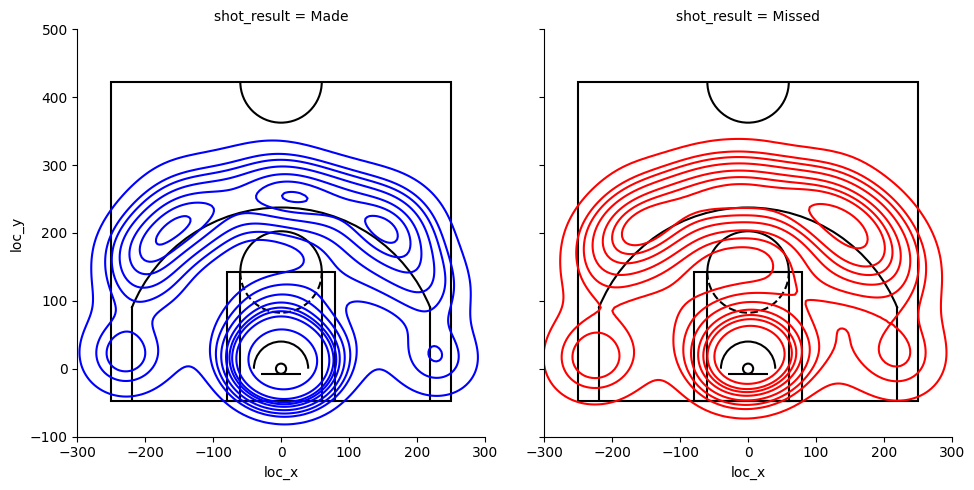

In [84]:
# Plot shot density for 2015-2016 season using KDE, one chart per shot result
season_df = df.query('season == "2015 - 2016"')

g = sns.displot(data=season_df, kind='kde', x='loc_x', y='loc_y',
                col='shot_result', fill=False, hue='shot_result', thresh=0.05
                , legend=False, palette={'Made': 'blue', 'Missed': 'red'})

for ax in g.axes.flat:
    draw_court(ax)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_aspect('equal')

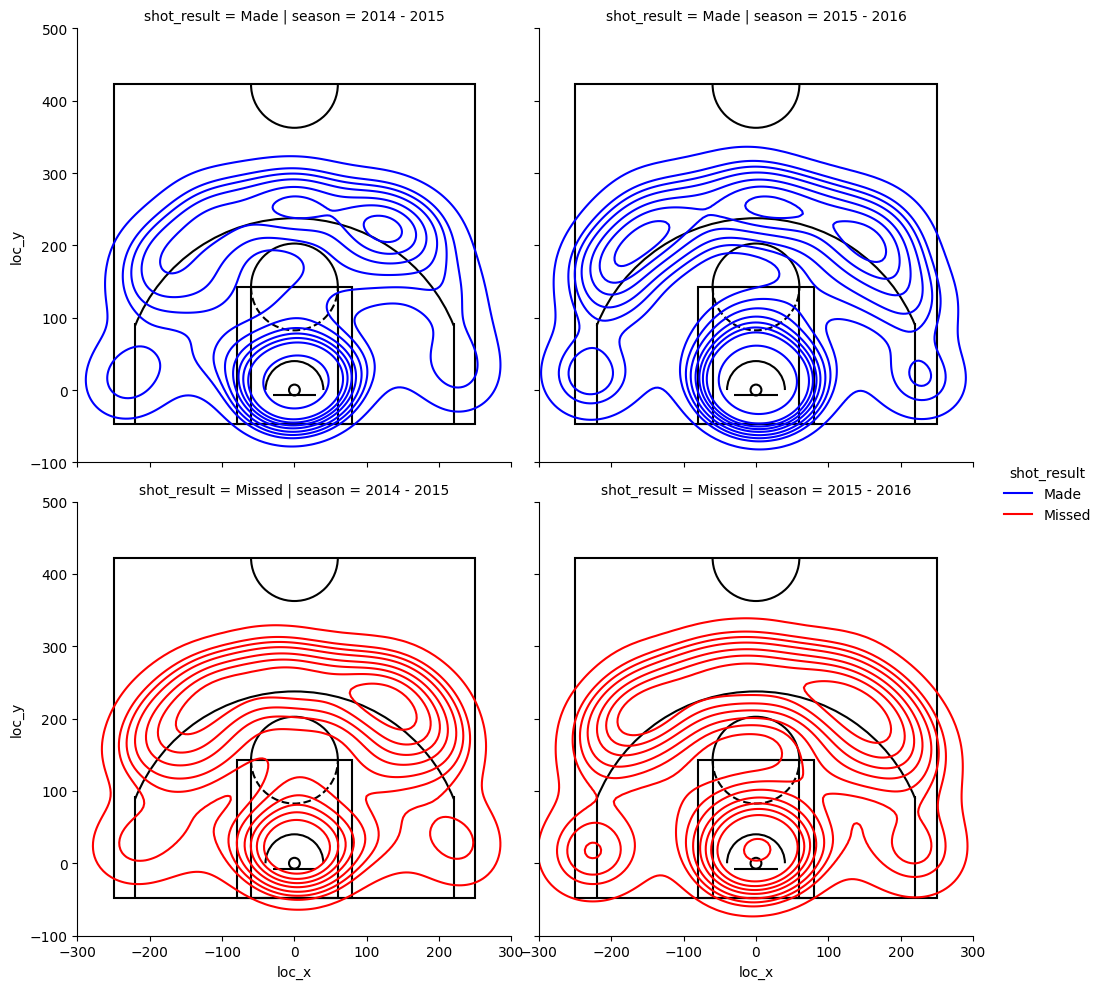

In [85]:
# Plot shot density for two seasons with court overlay
seasons = ['2014 - 2015', '2015 - 2016']
g = sns.displot(data=df.query('season in @seasons'), kind='kde',
                x='loc_x', y='loc_y', row='shot_result', col='season'
                , hue = 'shot_result', palette={'Made': 'blue', 'Missed': 'red'})

for ax in g.axes.flat:
    draw_court(ax)
    ax.set_xlim(-300, 300)
    ax.set_ylim(-100, 500)
    ax.set_aspect('equal')